## Exploratory data analysis: pairplots for hardness and corrosion datasets
**Author:** Y.X. Wu


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
 
# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

data_path = '../Dataset_Cleaned/'
display(os.path.isfile(data_path+'Hardness_database_YW_v3.xlsx'))


'Current working directory: /nethome/yuxiang.wu/CCA-representation-ML/Dataset_EDA_Pairplot_PCA_Mahalanobis'

True

### Import hardness dataset

In [2]:
# Define column names for the composition dataframe
column_names = ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf']

# Initialize an empty dataframe with the defined column names
df_compo = pd.DataFrame(columns=column_names)

# Define path to the Hardness dataset
hardness_data_path = data_path + 'Hardness_database_YW_v3.xlsx'

# Import the Hardness dataset, starting from the third row (header=2) because the first two rows are presumably not relevant
df_H = pd.read_excel(hardness_data_path, header=2)

# Display the column names of the imported dataframe
display(df_H.columns)

# Extract relevant columns from the Hardness dataframe, concatenating it with the empty composition dataframe
df_H_compo = pd.concat([df_compo, df_H[column_names]], axis=0, ignore_index=True)

# Fill in any NaN values with zero in the composition dataframe
df_H_compo.fillna(0, inplace=True)

# Display the first row of the finalized composition dataframe
display(df_H_compo.head(1))


Index(['Alloy ID', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf', 'delta_a',
       'Hmix', 'VEC', 'sigma_bulk_modulus', 'converted HV'],
      dtype='object')

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


### Import corrosion dataset

In [3]:
# Define column names for the composition dataframe
column_names = ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y']

# Define path to the Corrosion dataset
corrosion_data_path = data_path + 'Corrosion_database_YW_v3.xlsx'

# Import the Corrosion dataset, starting from the third row (header=2) because the first two rows are presumably not relevant
df_C = pd.read_excel(corrosion_data_path, header=2)

# Extract relevant columns from the Corrosion dataframe and concatenate it with the empty composition dataframe
df_C_compo = pd.concat([df_compo, df_C[column_names]], axis=0, ignore_index=True)

# Fill any NaN values in the composition dataframe with zero
df_C_compo.fillna(0, inplace=True)

# display the column names of the finalized composition dataframe to verify successful operation
display(df_C_compo.columns)

# Display the first row of the finalized composition dataframe
display(df_C_compo.head(1))


Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
      dtype='object')

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### Datasets labelling for both datasets

In [4]:
# Define a new column 'dataset' in Corrosion dataframe and assign it the value 'corrosion data'
df_C_compo = df_C_compo.assign(dataset='corrosion data')

# Display the last two rows of Corrosion dataframe and its shape
display(df_C_compo.tail(2))
display(df_C_compo.shape)

# Define a new column 'dataset' in Hardness dataframe and assign it the value 'hardness data'
df_H_compo = df_H_compo.assign(dataset='hardness data')

# Display the last two rows of Hardness dataframe and its shape
display(df_H_compo.tail(2))
display(df_H_compo.shape)

# Concatenate Corrosion and Hardness dataframes
df_conc = pd.concat([df_C_compo, df_H_compo], ignore_index=True)

# Export the concatenated dataframe to an Excel file
df_conc.to_excel('pairplot_corrosion_hardness_datasets.xlsx')

# Display the first two rows of the concatenated dataframe
display(df_conc.head(2))

# Display the last two rows and the shape of the concatenated dataframe
display(df_conc.tail(2))
display(df_conc.shape)


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
710,0.002,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.002,1.30,...,98.689,0.0,0.0,0.0,0.0,0.00,0.0,0,0,corrosion data
711,0.160,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.080,0.02,...,97.040,0.0,0.0,0.0,0.0,2.43,0.0,0,0,corrosion data


(712, 21)

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
678,21.72,20.23,22.83,0.00,0.0,0,0.0,0.0,0.0,0.0,...,10.5,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,hardness data
679,20.17,0.00,42.40,6.93,0.0,0,0.0,0.0,0.0,0.0,...,0.0,9.2,0.0,0.0,21.29,0,0.0,0.0,0.0,hardness data


(680, 21)

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,corrosion data
1,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,corrosion data


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
1390,21.72,20.23,22.83,0.00,0.0,0,0.0,0.0,0.0,0.0,...,10.5,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,hardness data
1391,20.17,0.00,42.40,6.93,0.0,0,0.0,0.0,0.0,0.0,...,0.0,9.2,0.0,0.0,21.29,0,0.0,0.0,0.0,hardness data


(1392, 21)


### Pairplot (section) for both hardness and corrosion datasets
show the overlap between the compositional feature space

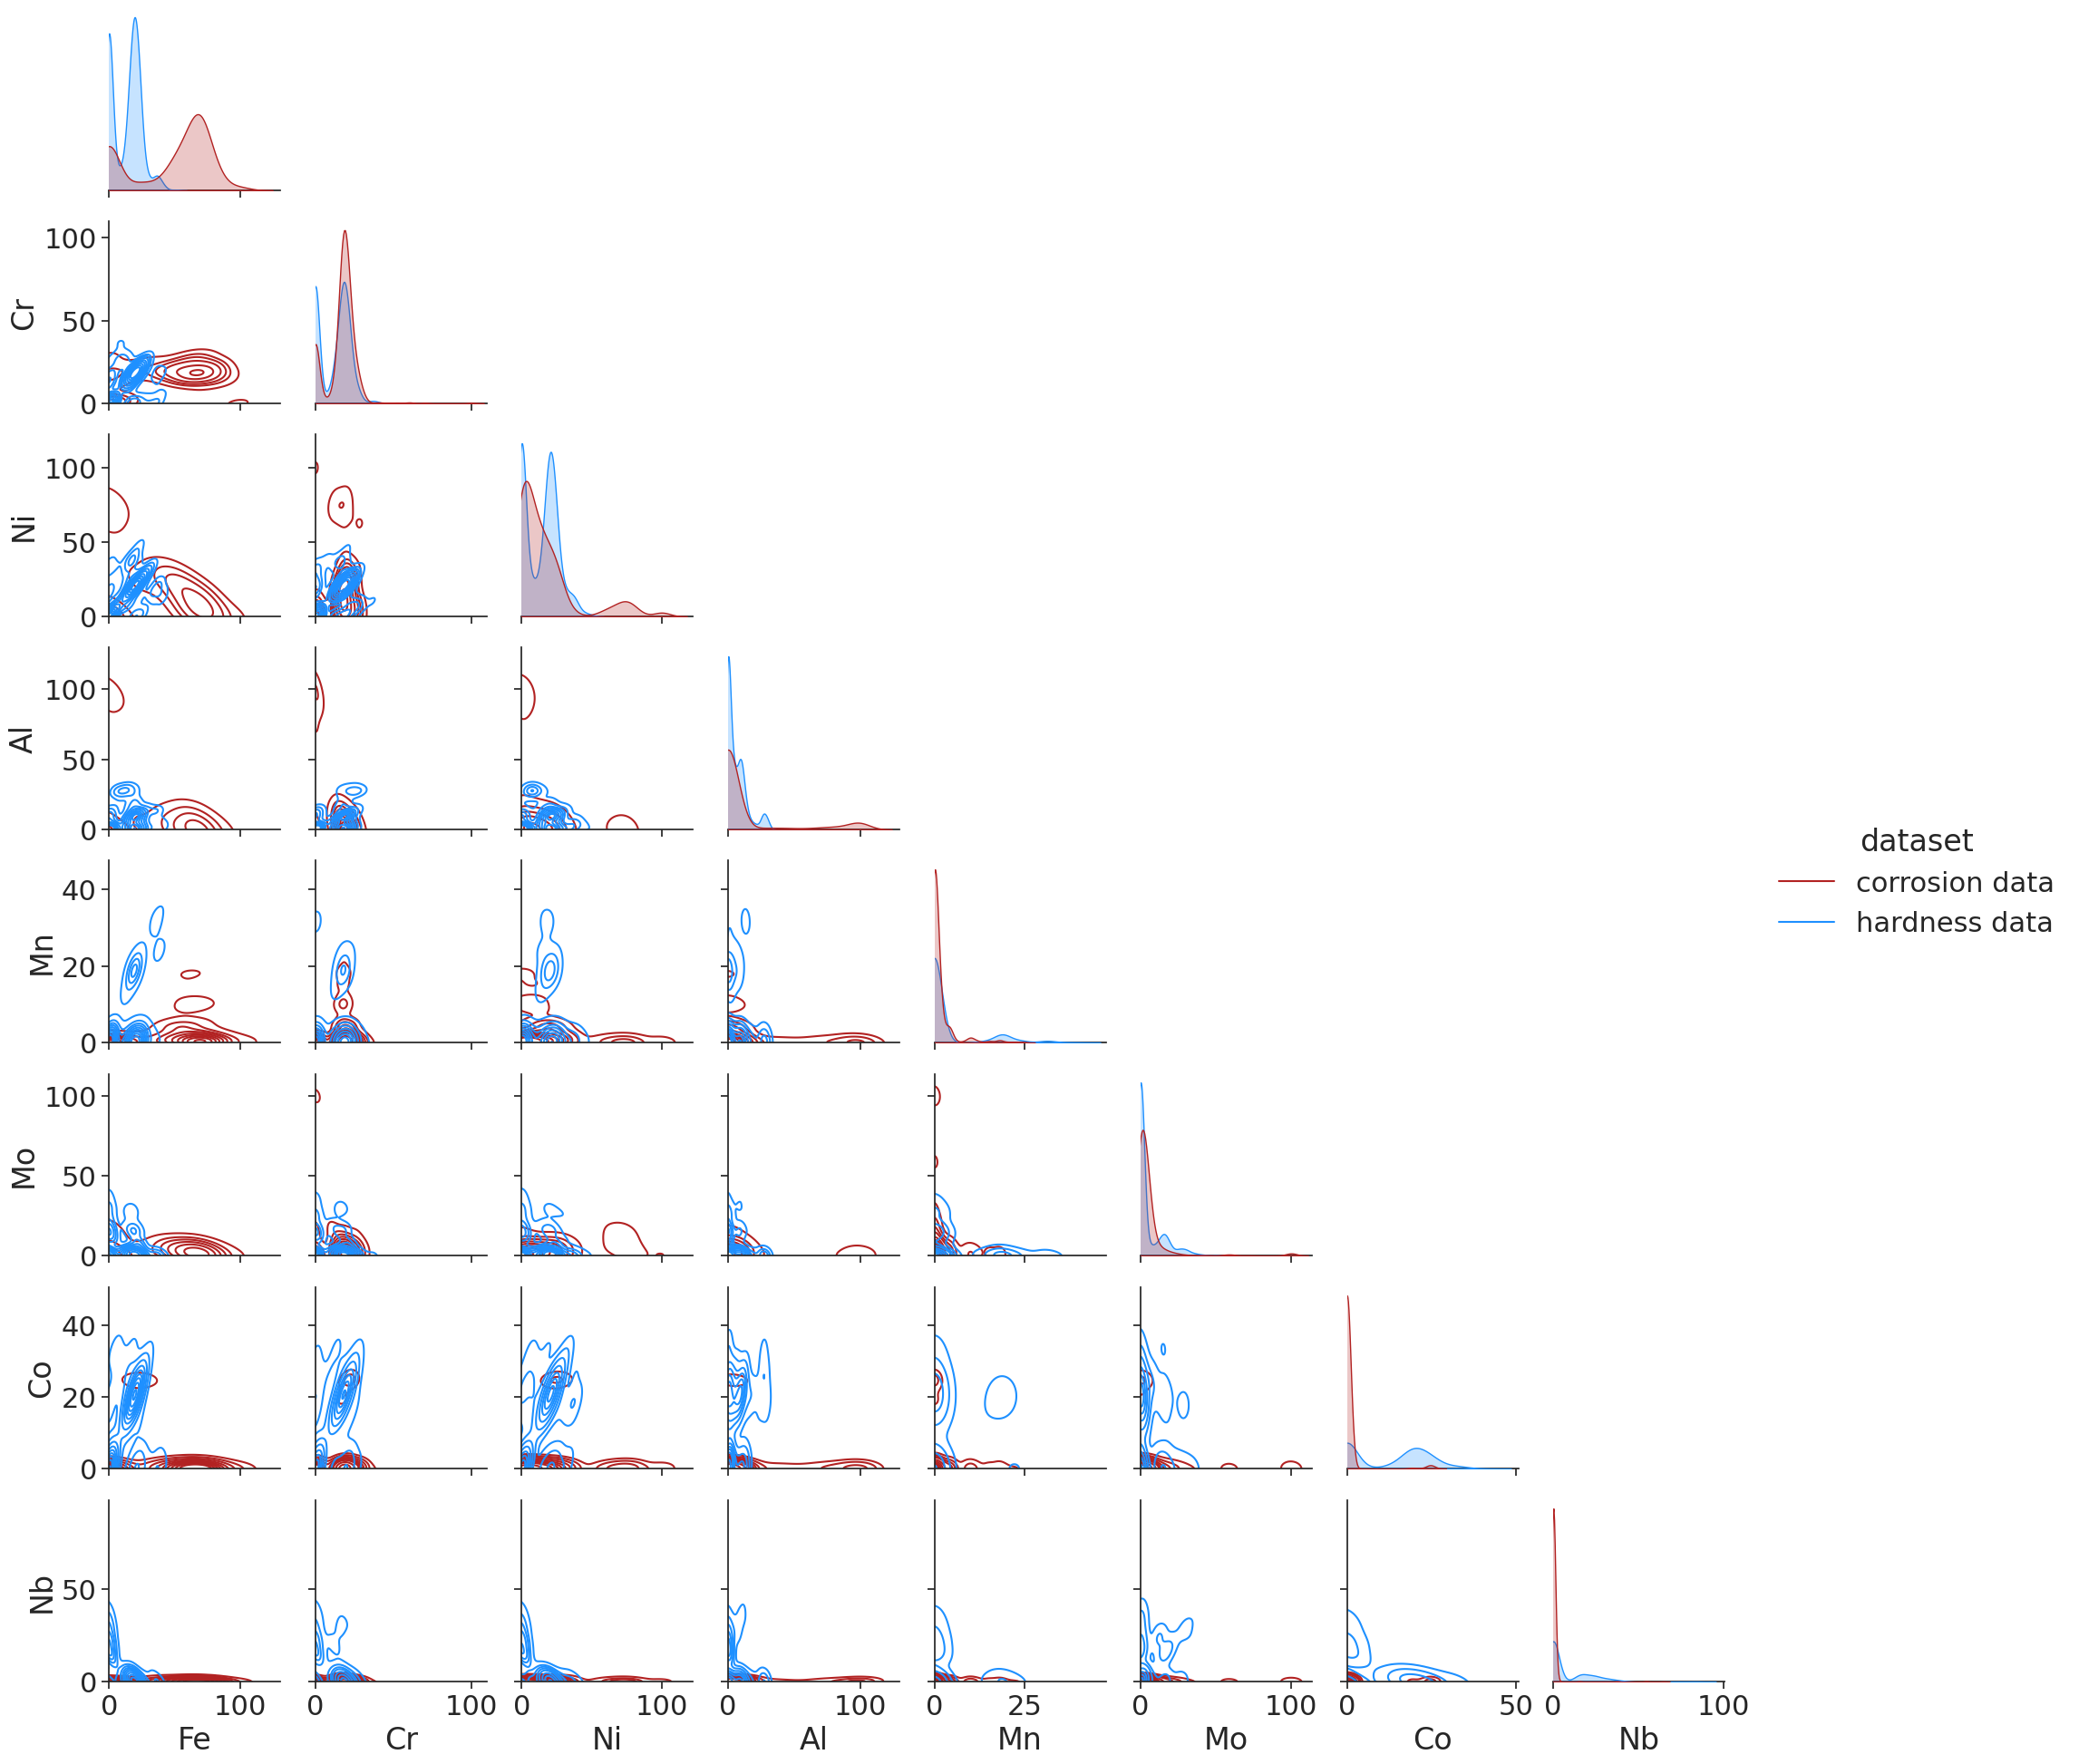

In [9]:
# Import necessary library
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="ticks", color_codes=True)

# Set the context parameters to control the plot aesthetics, including font scale
sns.set_context("notebook", font_scale=2)

# Define color palette for the pairplot
palette = ["firebrick", "dodgerblue"]

# Create a pairplot for the selected variables, using Kernel Density Estimate (KDE) plots
# Corner=True will plot only the lower triangle
grid = sns.pairplot(df_conc, vars=['Fe', 'Cr', 'Ni', 'Al', 'Mn', 'Mo', 'Co', 'Nb'], 
                    kind="kde", corner=True, hue="dataset", palette=palette)

# Loop through the axes to adjust the x and y limits
for i in range(len(grid.axes)):
    for j in range(len(grid.axes[i])):
        ax = grid.axes[i][j]
        # If the current axis is not None, set the lower limit to 0 while leaving the upper limit unchanged
        if ax is not None:
            ax.set_xlim(left=0) 
            ax.set_ylim(bottom=0)

# Save the plot as an image file
plt.savefig('pairplot_section.png')

# Display the pairplot
plt.show()


### Pairplot (full) for both hardness and corrosion datasets

Taylor2018: Taylor et al._Integrated computational materials engineering of corrosion resistant alloys_2018

Expanding Marcus's conceptual model to explain the ability of alloying elements to impart localized corrosion resistance

* others: 'Fe', 'Ni', 'Co', 'Cu', 'Si'
* Passivity promotor: 'Cr', 'Ti', 'Al', 'V', 'Mn' 
* Dissolution blocker: 'Mo', 'W', 'Nb', 'Ta'


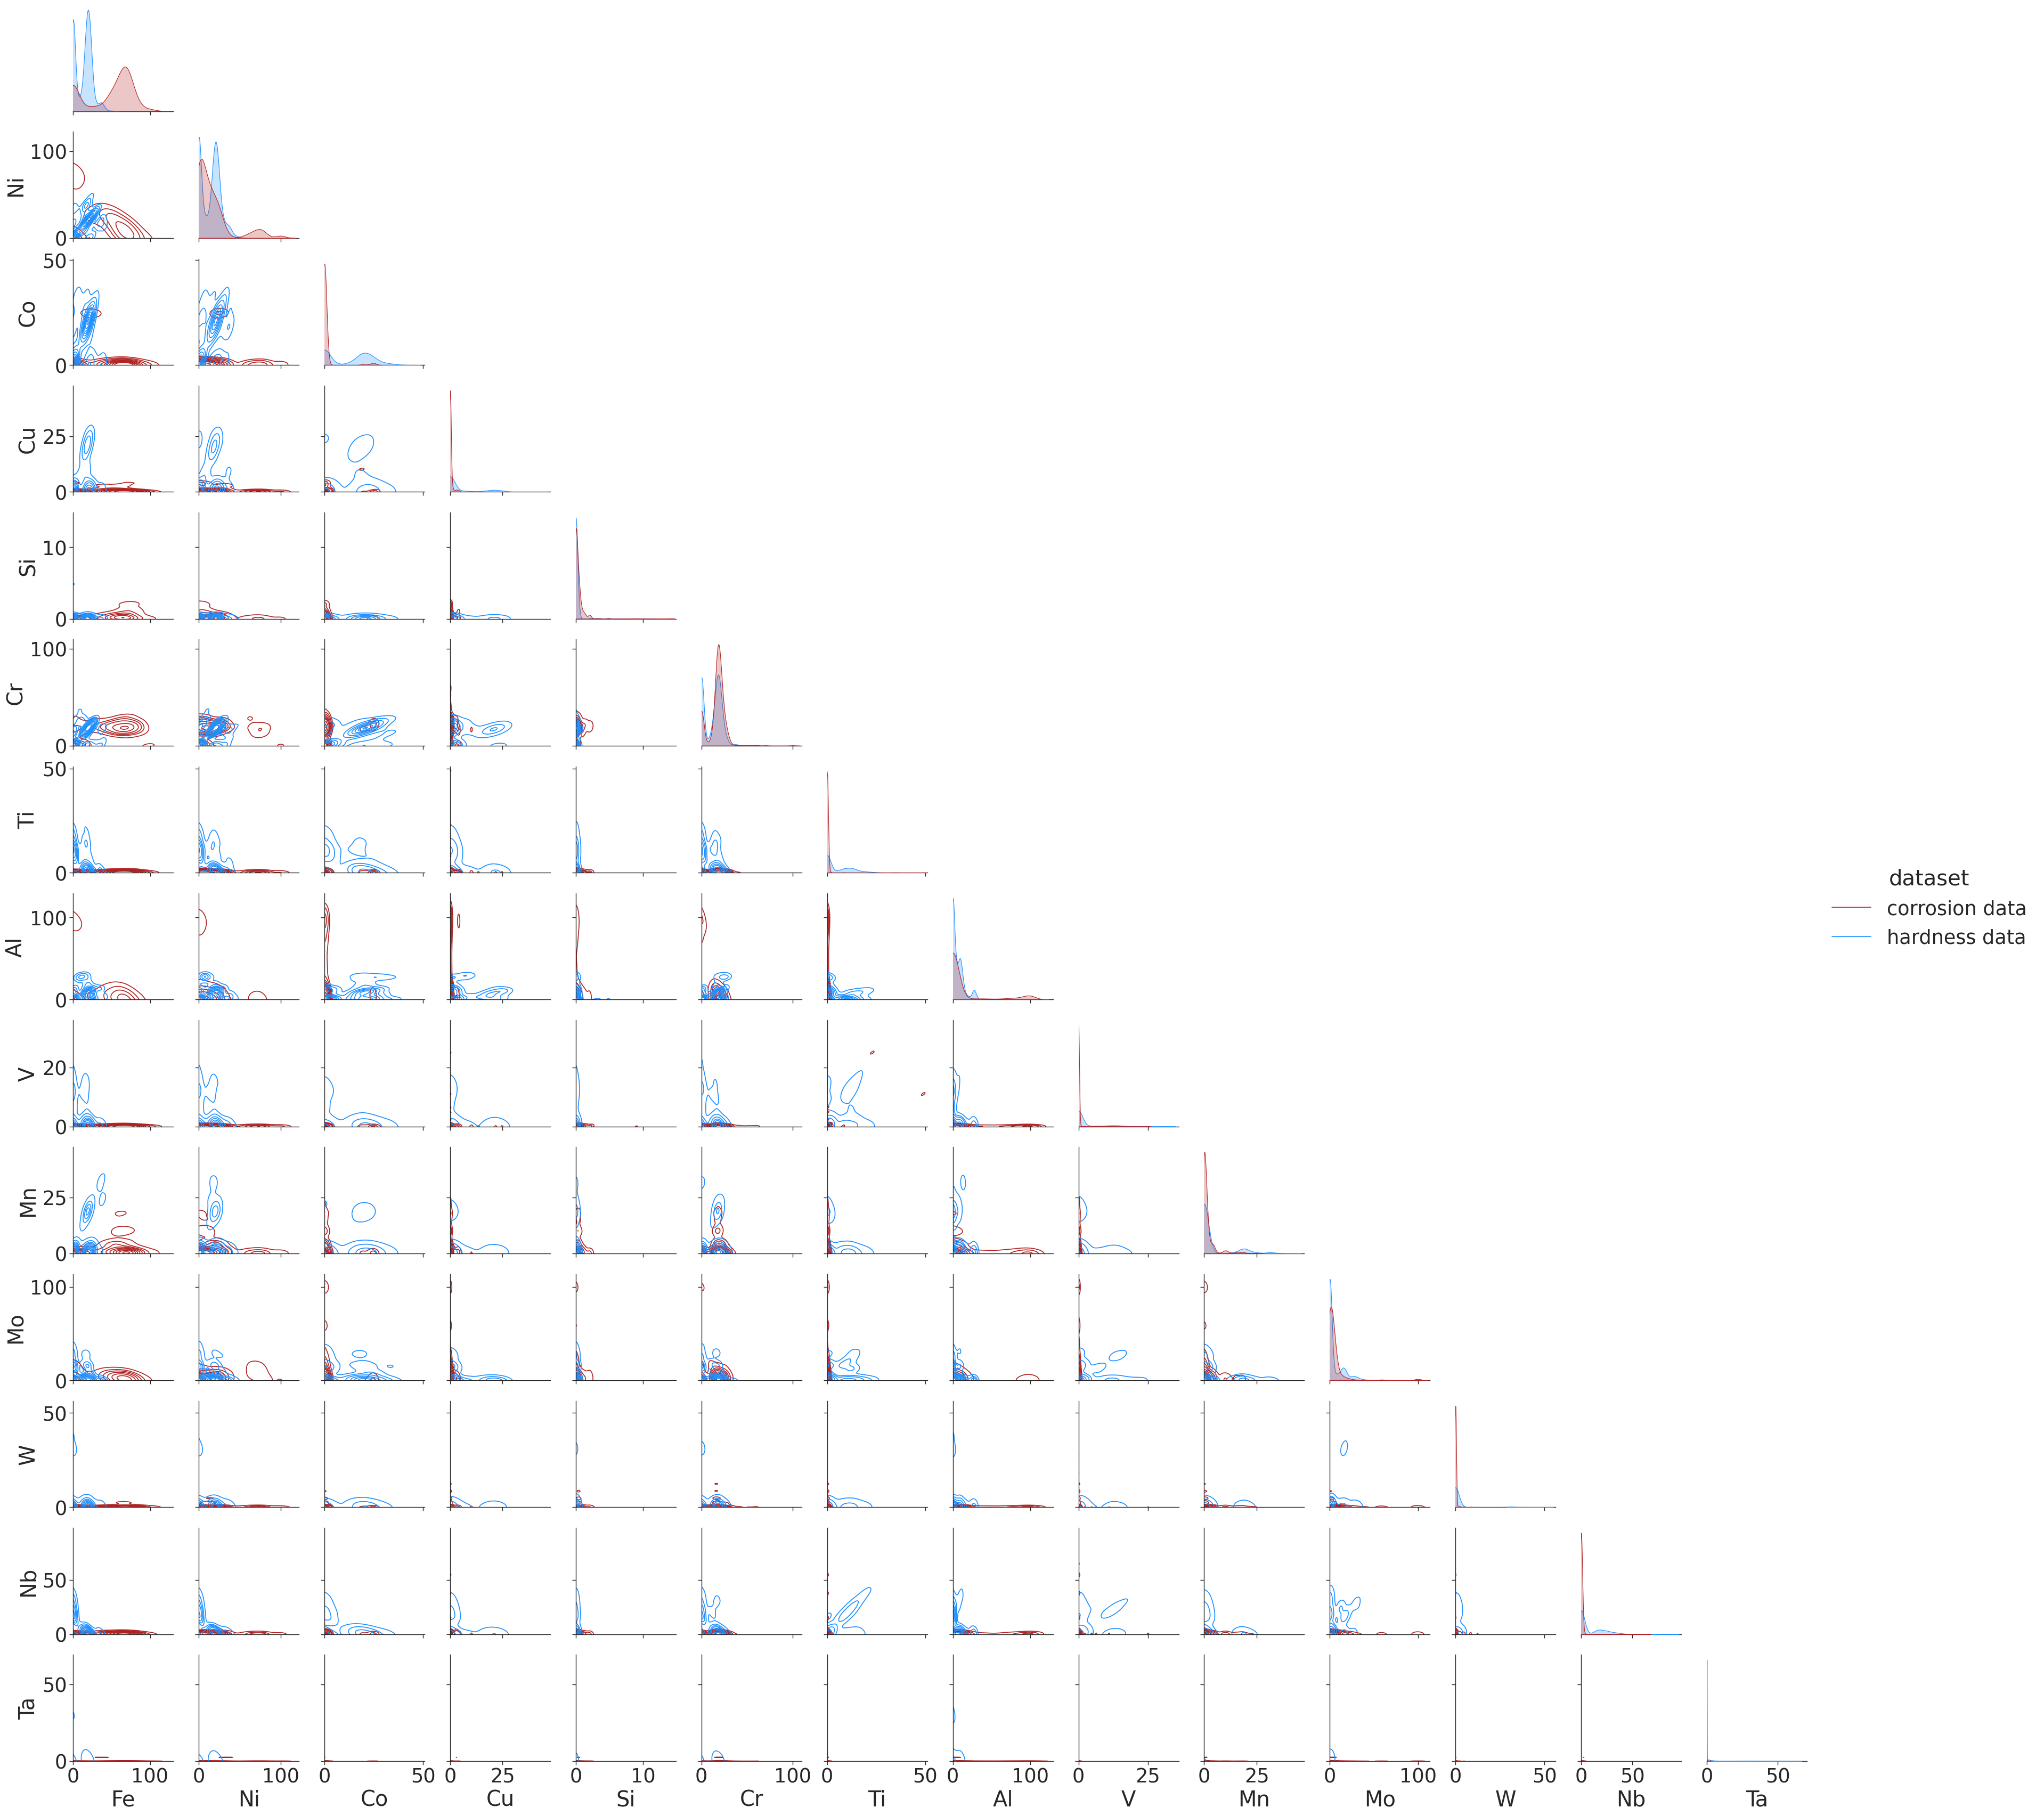

In [8]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots to have ticks and color codes
sns.set(style="ticks", color_codes=True)

# Set the context to 'paper' for better aesthetics in a paper, increase font scale for readability
sns.set_context("paper", font_scale=3)

# Define color palette for the pairplot with two colors: firebrick and dodgerblue
palette = ["firebrick", "dodgerblue"]

# Generate pairplot for the selected variables in the dataframe (df_conc)
# The plot type is Kernel Density Estimate (kde) to visualize the probability density of the data
# 'corner=True' means plot only the lower triangle, 'hue' parameter is used to group by 'dataset'
sns_fig = sns.pairplot(df_conc, vars=['Fe', 'Ni', 'Co', 'Cu', 'Si', 'Cr', 'Ti', 'Al', 'V', 'Mn', 'Mo', 'W', 'Nb', 'Ta'], 
                       kind="kde", corner=True, hue="dataset", palette=palette)

# Iterate over each axis in the pairplot to set the x and y limits
for i in range(len(sns_fig.axes)):
    for j in range(len(sns_fig.axes[i])):
        ax = sns_fig.axes[i][j]
        # If the current axis is not None, set the lower limit to 0 while leaving the upper limit unchanged
        if ax is not None:
            ax.set_xlim(left=0) 
            ax.set_ylim(bottom=0)

# Save the pairplot as an image file
sns_fig.savefig('pairplot_full.png')

# Display the pairplot
plt.show()
